In [ ]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_path = 'train'
test_path = "test"


train_datagen=ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)
val_datagen=ImageDataGenerator(rescale=1./255, validation_split=0.1)

test_datagen=ImageDataGenerator(rescale=1./255)


train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    shuffle=True,
    class_mode='categorical',
    batch_size=128,
    subset='training'
)

val_generator=val_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    shuffle=False,
    class_mode='categorical',
    batch_size=128,
    subset='validation'
)


test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    shuffle=True,
    class_mode='categorical',
    batch_size=1
)

Found 4711 images belonging to 3 classes.
Found 521 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


In [ ]:
from keras import layers
from keras.models import Sequential, Model
from keras.optimizers import Adam, RMSprop
from keras.utils.np_utils import to_categorical
from keras.layers import  Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization,GlobalAveragePooling2D
import tensorflow as tf
from keras.applications.vgg19 import VGG19
vgg19=VGG19(input_shape=(224,224,3),include_top=False)
vgg19.trainable=False

x=Flatten()(vgg19.output)
x = Dense(128, activation='relu')(x)
out=Dense(3,activation='softmax')(x)
model=Model(inputs=vgg19.inputs,outputs=out)

model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples//128,
    validation_data = val_generator,
    epochs = 10,
    validation_steps = val_generator.samples//128,
    verbose=1
)

Epoch 1/10
36/36 [==============================] - 960s 27s/step - loss: 2.4064 - accuracy: 0.3941 - val_loss: 0.8365 - val_accuracy: 0.5312
Epoch 2/10
36/36 [==============================] - 948s 26s/step - loss: 0.7897 - accuracy: 0.6544 - val_loss: 0.6349 - val_accuracy: 0.7539
Epoch 3/10
36/36 [==============================] - 990s 27s/step - loss: 0.6831 - accuracy: 0.7043 - val_loss: 0.5608 - val_accuracy: 0.7285
Epoch 4/10
36/36 [==============================] - 987s 27s/step - loss: 0.6349 - accuracy: 0.7301 - val_loss: 0.4744 - val_accuracy: 0.8398
Epoch 5/10
36/36 [==============================] - 912s 25s/step - loss: 0.6049 - accuracy: 0.7390 - val_loss: 0.4447 - val_accuracy: 0.8730
Epoch 6/10
36/36 [==============================] - 993s 28s/step - loss: 0.5924 - accuracy: 0.7425 - val_loss: 0.4715 - val_accuracy: 0.8008
Epoch 7/10
36/36 [==============================] - 998s 28s/step - loss: 0.5609 - accuracy: 0.7587 - val_loss: 0.4457 - val_accuracy: 0.8770
Epoch 

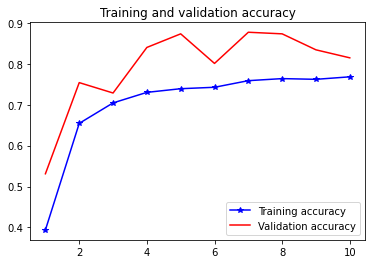

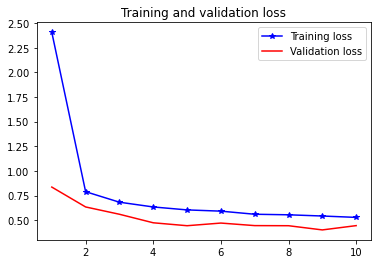

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b*-', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'b*-', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict_generator(generator=test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
target_names = ['class1', 'class 2', 'class 3']
print(classification_report(y_true, y_pred, target_names=target_names))

Instructions for updating:
Please use Model.predict, which supports generators.
              precision    recall  f1-score   support

      class1       0.39      0.34      0.36       234
     class 2       0.38      0.52      0.44       242
     class 3       0.22      0.14      0.17       148

    accuracy                           0.36       624
   macro avg       0.33      0.33      0.32       624
weighted avg       0.35      0.36      0.35       624



In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict_generator(generator=test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
cm=confusion_matrix(y_true,y_pred)

print(cm)

[[ 78 130  26]
 [ 75 123  44]
 [ 53  73  22]]
